**DATA CLEANING**

Importing the necessary libraries and reading the data.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12,8)
import seaborn as sns
plt.style.use('seaborn')
sns.set_style('whitegrid')

In [2]:
df1 = pd.read_csv("laptopPrice.csv")
df1.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [3]:
df1.shape

(823, 19)

There are no null values in the dataset.

In [4]:
df1.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

Price is our dependent variable in the regression model, and the others are dependent variables.

In [5]:
df1.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [6]:
df1.duplicated().sum()

21

In [7]:
df1= df1.drop_duplicates()

In [8]:
df1.duplicated().sum()

0

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    object
 5   ram_type           802 non-null    object
 6   ssd                802 non-null    object
 7   hdd                802 non-null    object
 8   os                 802 non-null    object
 9   os_bit             802 non-null    object
 10  graphic_card_gb    802 non-null    object
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    object
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null    object
 1

In [10]:
df1.nunique()

brand                  8
processor_brand        3
processor_name        11
processor_gnrtn        8
ram_gb                 4
ram_type               6
ssd                    7
hdd                    4
os                     3
os_bit                 2
graphic_card_gb        5
weight                 3
warranty               4
Touchscreen            2
msoffice               2
Price                405
rating                 5
Number of Ratings    282
Number of Reviews    135
dtype: int64

In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,802.0,76625.543641,45232.984422,16990.0,45990.0,63990.0,89525.00,441990.0
Number of Ratings,802.0,299.844140,1001.784420,0.0,0.0,17.0,140.25,15279.0
Number of Reviews,802.0,36.089776,118.313553,0.0,0.0,2.0,18.00,1947.0


Currency used for he price is Indian Rupee. Let's convert it to USD considering the exchange rate in 21.05.2023.

In [12]:
exchange_rate = 82.91

df1['Price_USD'] = df1['Price'] / exchange_rate
df1.drop("Price", axis=1, inplace=True)

In [13]:
df1['Price_USD'] = df1['Price_USD'].round(2)

In [14]:
df1.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating,Number of Ratings,Number of Reviews,Price_USD
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,2 stars,3,0,417.91
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars,65,5,470.38
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars,8,1,482.44
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,3 stars,0,0,844.17
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars,0,0,325.53


Detecting and handling the outliers. Histograms for three of the numerical variables are right-skewed. 

Number of filled rows for Price_USD: 18

Number of filled rows for Number of Ratings: 16

Number of filled rows for Number of Reviews: 15


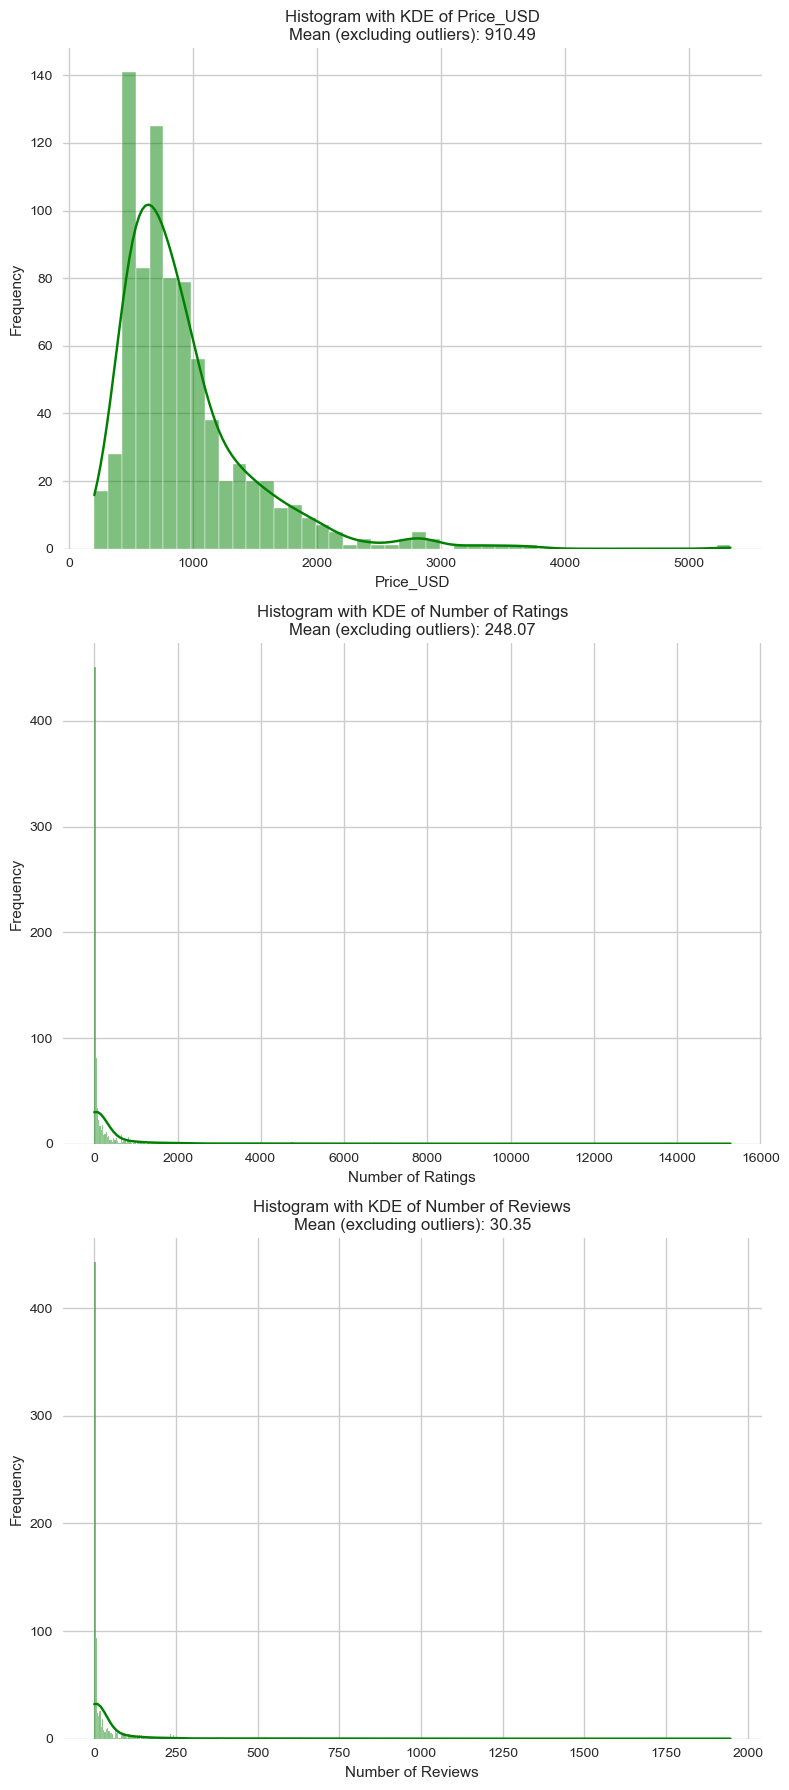

Number of filled rows for Price_USD: 18
Number of filled rows for Number of Ratings: 16
Number of filled rows for Number of Reviews: 15


In [15]:
# Selecting numerical variables for histogram
numerical_variables = ['Price_USD', 'Number of Ratings', 'Number of Reviews']
# Create subplots
fig, axes = plt.subplots(len(numerical_variables), 1, figsize=(8, 6 * len(numerical_variables)))

# Dictionary to store the count of filled rows for each variable
filled_counts = {}

# Loop through numerical variables
for counter, column in enumerate(numerical_variables):
    # Plot histogram with KDE
    sns.histplot(df1[column], ax=axes[counter], kde=True, color='g')
    
    # Calculate outlier thresholds
    max_value = (3 * df1[column].std()) + df1[column].mean()
    min_value = -((3 * df1[column].std()) + df1[column].mean())
    
    # Replace outliers with new values
    filled_rows = df1[(df1[column] < min_value) | (df1[column] > max_value)].shape[0]
    filled_counts[column] = filled_rows
    
    df1[column] = np.where(df1[column] < min_value, min_value, df1[column])
    df1[column] = np.where(df1[column] > max_value, max_value, df1[column])
    
    # Calculate mean excluding outliers
    mean = df1[column].mean()
    
    # Set plot labels and title
    axes[counter].set_xlabel(column)
    axes[counter].set_ylabel('Frequency')
    axes[counter].set_title(f'Histogram with KDE of {column}\nMean (excluding outliers): {mean:.2f}')
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Print the number of filled rows for each variable
for variable, count in filled_counts.items():
    print(f"Number of filled rows for {variable}: {count}")

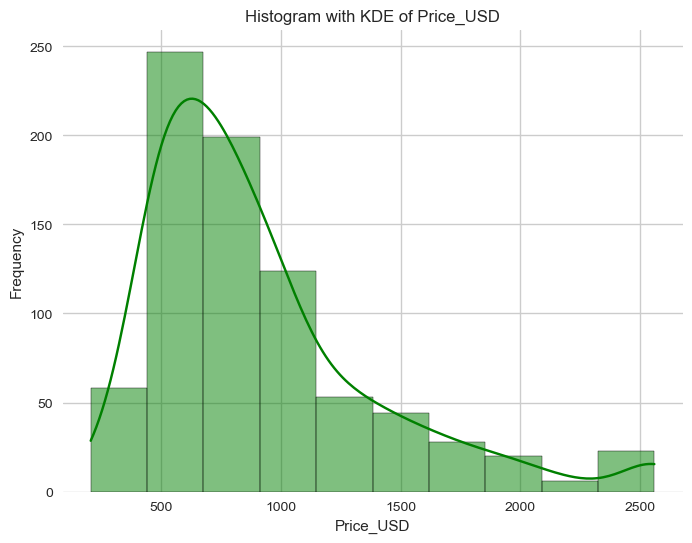

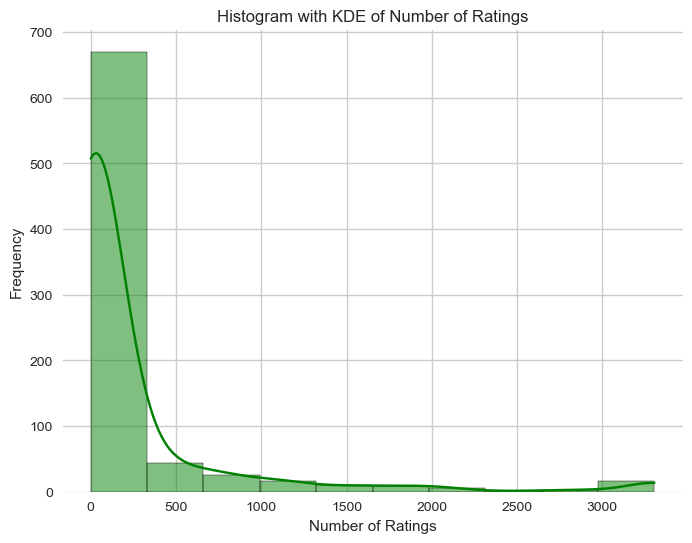

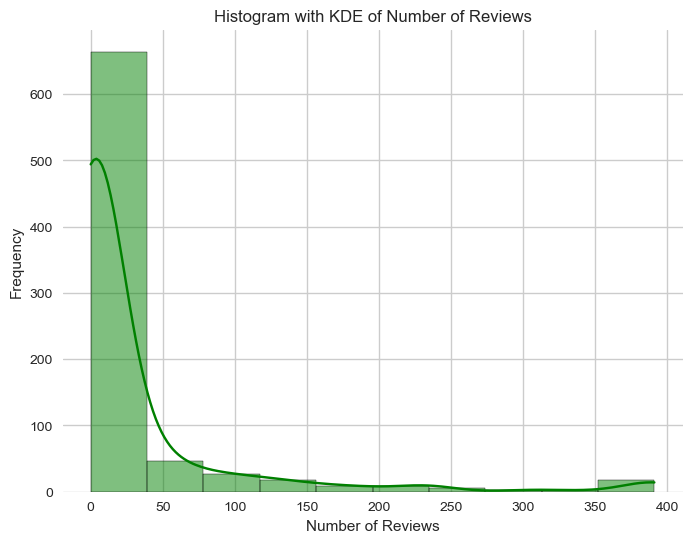

In [16]:
# Setting blue color palette
sns.set_palette('Blues')

# Creating histograms with KDE plots for each variable
for variable in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df1[variable], bins=10, kde=True, color='g', edgecolor='black')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Histogram with KDE of {variable}')
    plt.show()

In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of Ratings,802.0,248.072517,608.555579,0.00,0.0,17.0,140.2500,3305.197400
Number of Reviews,802.0,30.352190,73.223293,0.00,0.0,2.0,18.0000,391.030434
Price_USD,802.0,910.490778,485.483530,204.92,554.7,771.8,1079.7875,2560.903565


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              802 non-null    object 
 1   processor_brand    802 non-null    object 
 2   processor_name     802 non-null    object 
 3   processor_gnrtn    802 non-null    object 
 4   ram_gb             802 non-null    object 
 5   ram_type           802 non-null    object 
 6   ssd                802 non-null    object 
 7   hdd                802 non-null    object 
 8   os                 802 non-null    object 
 9   os_bit             802 non-null    object 
 10  graphic_card_gb    802 non-null    object 
 11  weight             802 non-null    object 
 12  warranty           802 non-null    object 
 13  Touchscreen        802 non-null    object 
 14  msoffice           802 non-null    object 
 15  rating             802 non-null    object 
 16  Number of Ratings  802 non

**EXPLORATORY DATA ANALYSIS (EDA)**

In [19]:
df2 = df1.copy()
df2.shape

(802, 19)

In [20]:
df2.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating',
       'Number of Ratings', 'Number of Reviews', 'Price_USD'],
      dtype='object')

Looking at the correlation matrix, number of ratings and number of reviews are highly correlated. These two variables have negative correlation with price. 

In [21]:
df2.corr()

,Number of Ratings,Number of Reviews,Price_USD
Number of Ratings,1.000000,0.991234,-0.209372
Number of Reviews,0.991234,1.000000,-0.206741
Price_USD,-0.209372,-0.206741,1.000000


The chart below shows that higher-priced laptops get fewer reviews and ratings. Probably because they are sold less.

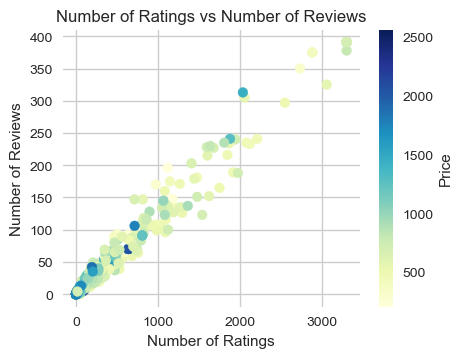

In [22]:
plt.figure(figsize=(4.8, 3.6))
plt.scatter(df2['Number of Ratings'], df2['Number of Reviews'], c=df2['Price_USD'], cmap='YlGnBu')
plt.colorbar(label='Price')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Reviews')
plt.title('Number of Ratings vs Number of Reviews')
plt.show()

Histograms of variables.

In [23]:
df2['processor_gnrtn'].replace(np.nan, 'Not Available', inplace=True)

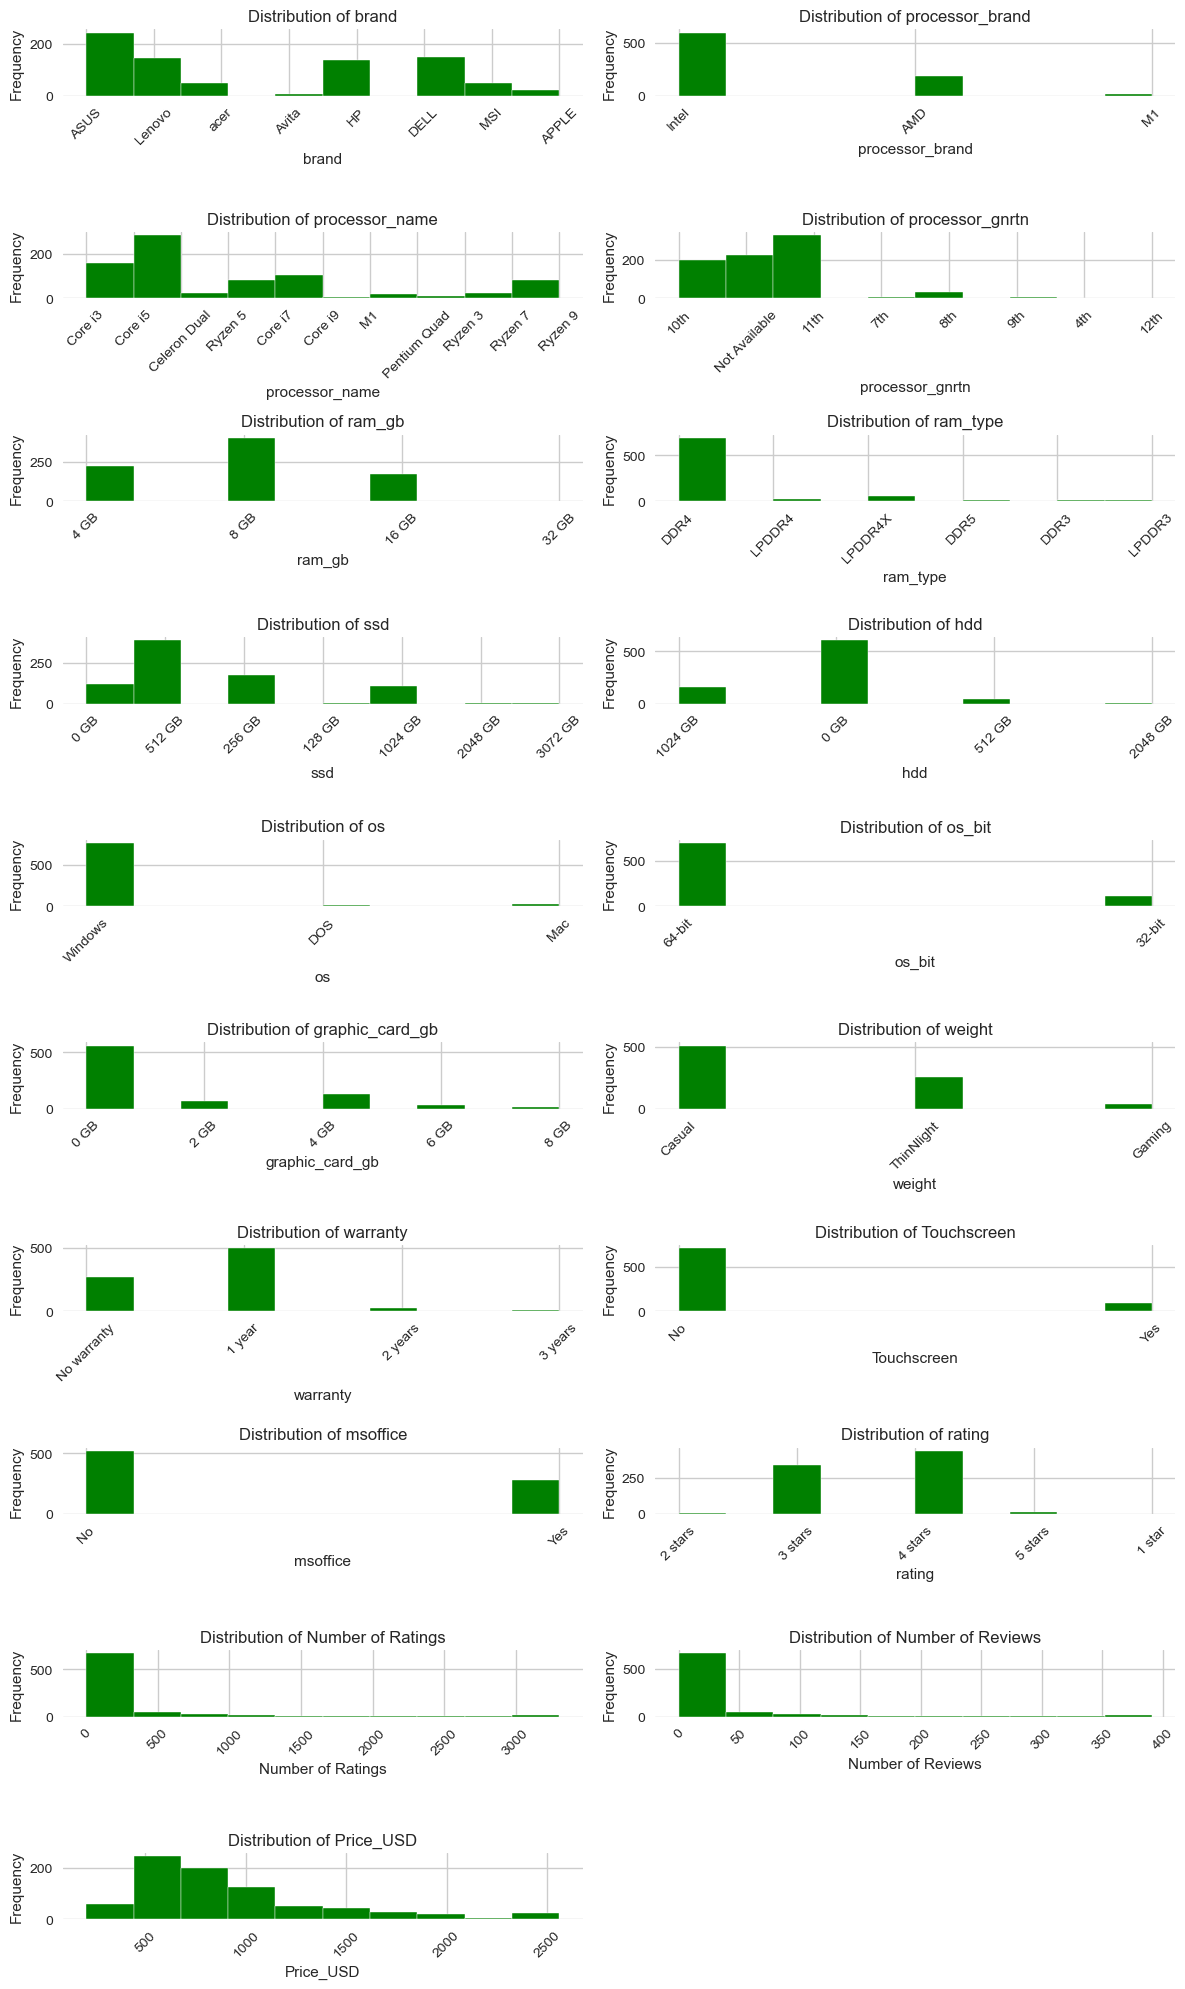

In [24]:
column_names = df2.columns

# Calculate the number of rows and columns for subplots
num_rows = 10
num_cols = len(column_names) // num_rows + (len(column_names) % num_rows > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))
fig.subplots_adjust(hspace=0.4)

# Iterate over column names and plot histograms
for i, column in enumerate(column_names):
    ax = axes[i // num_cols, i % num_cols]
    df2[column].hist(ax=ax, color='g')  # Set the color to green
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {column}')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove empty subplots if there are any
if len(column_names) % num_rows != 0:
    empty_subplots = num_rows * num_cols - len(column_names)
    for j in range(empty_subplots):
        fig.delaxes(axes.flatten()[-(j + 1)])

# Show the plot
plt.tight_layout()
plt.show()


Relations between all variables and price.

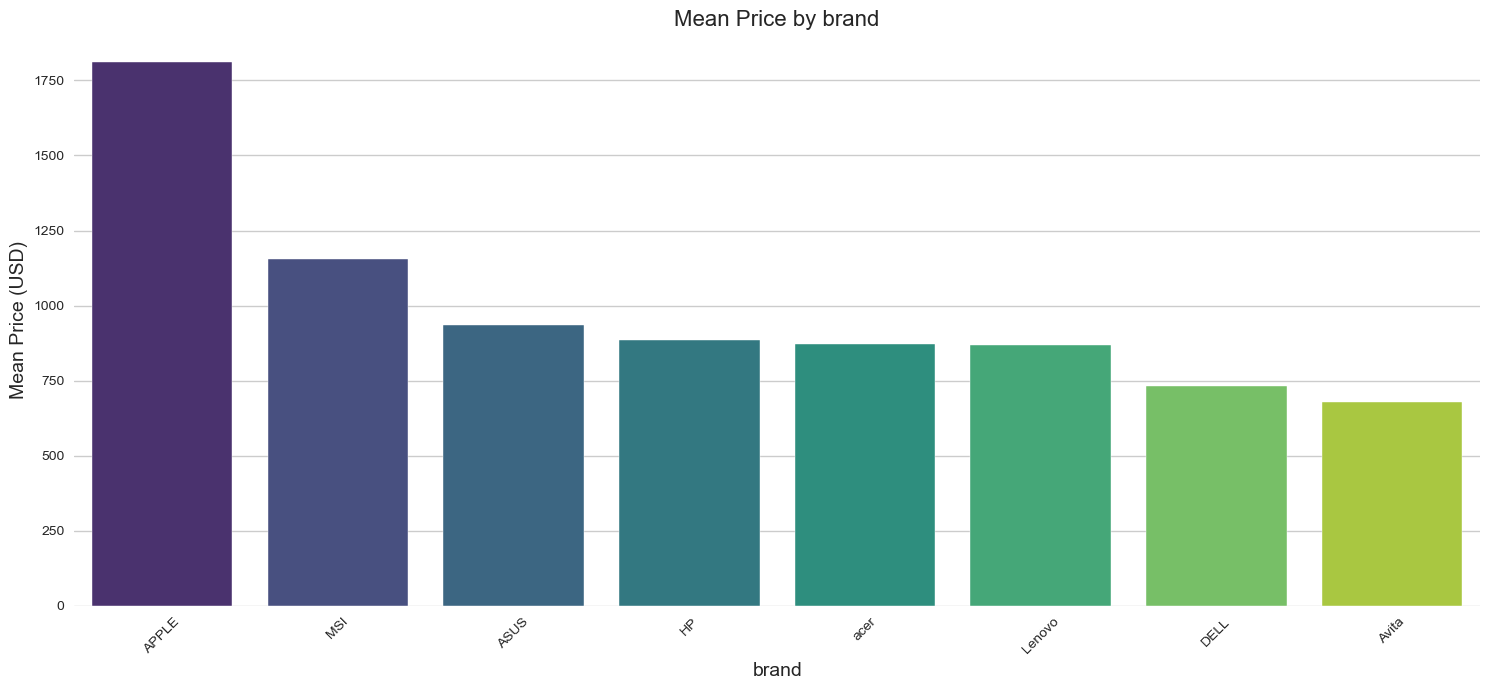

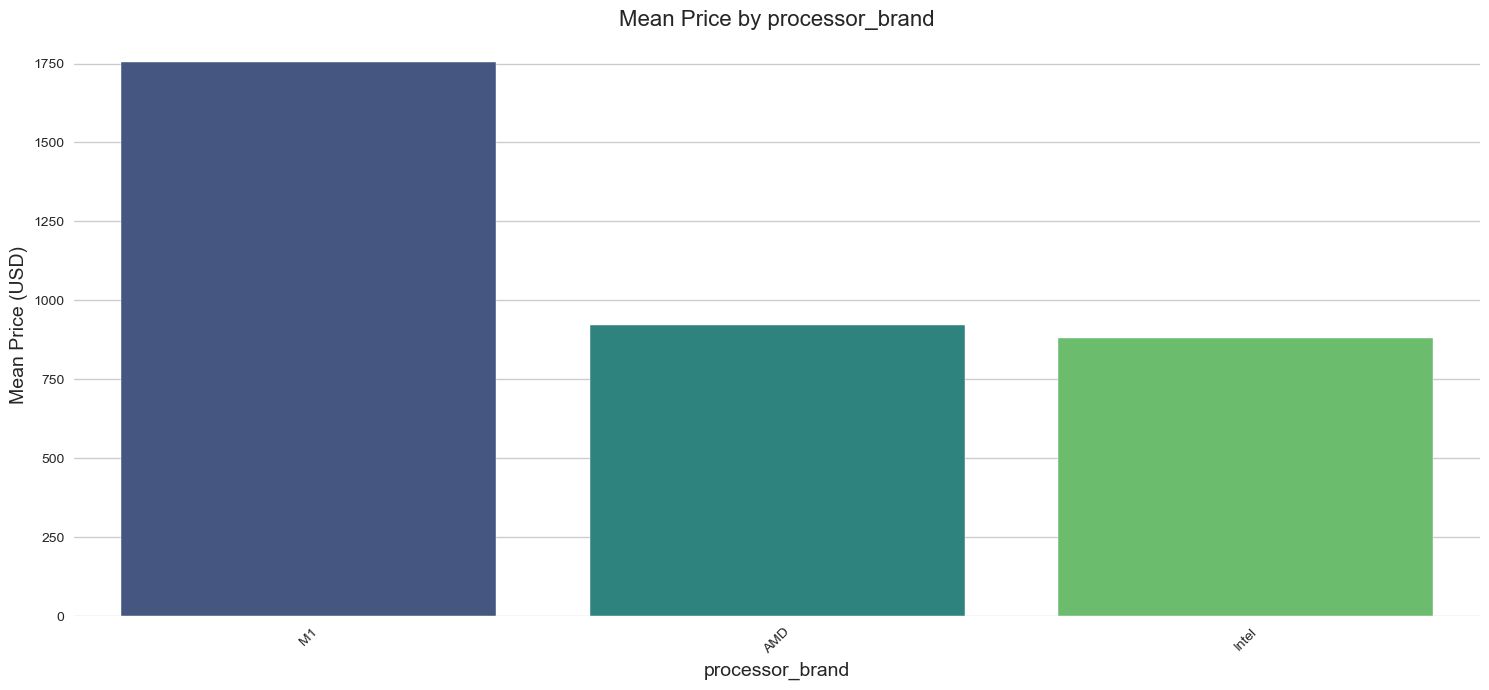

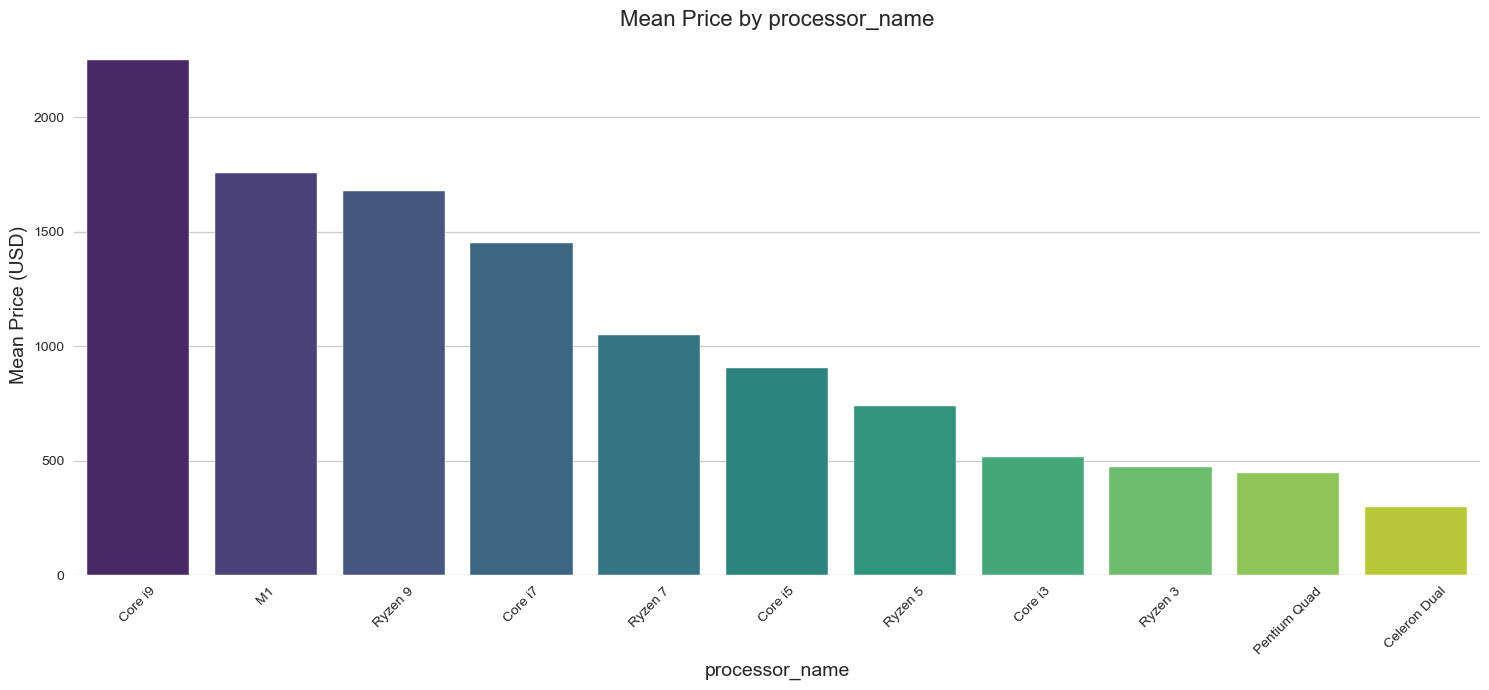

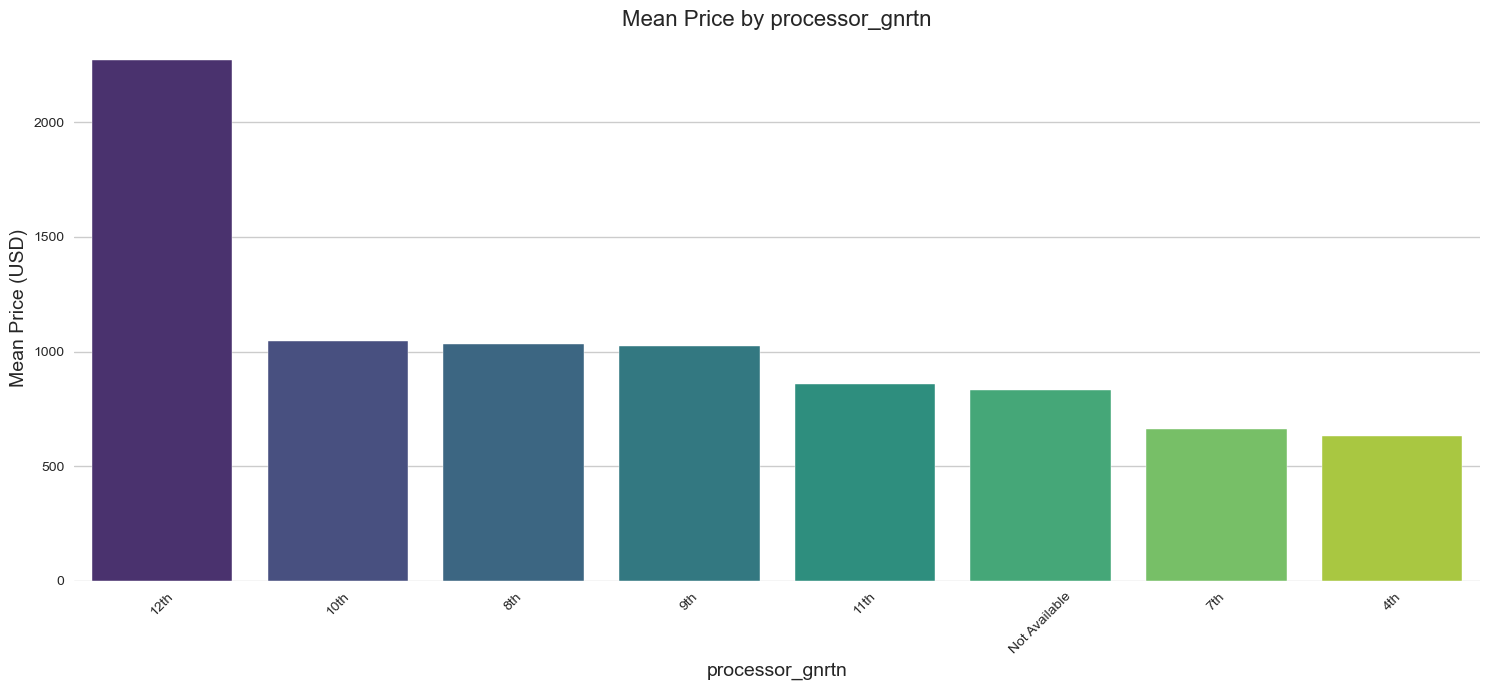

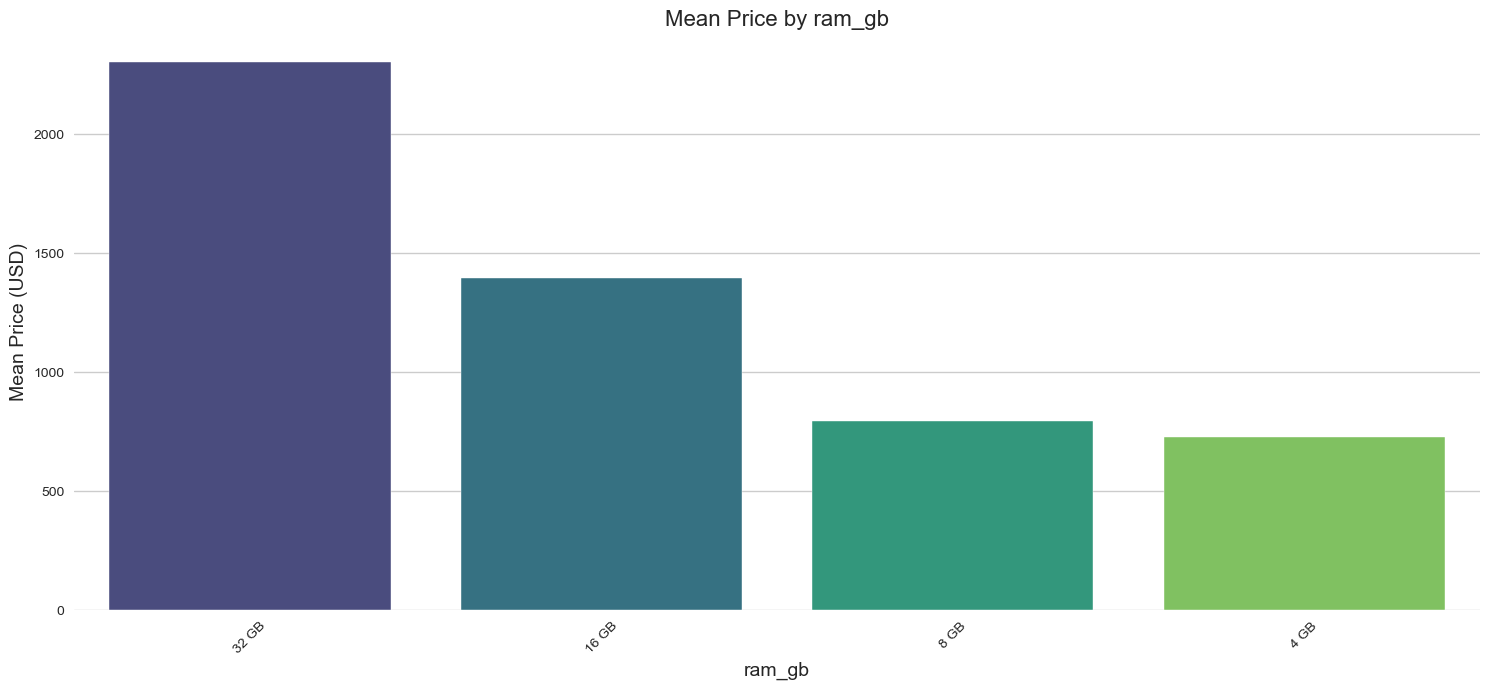

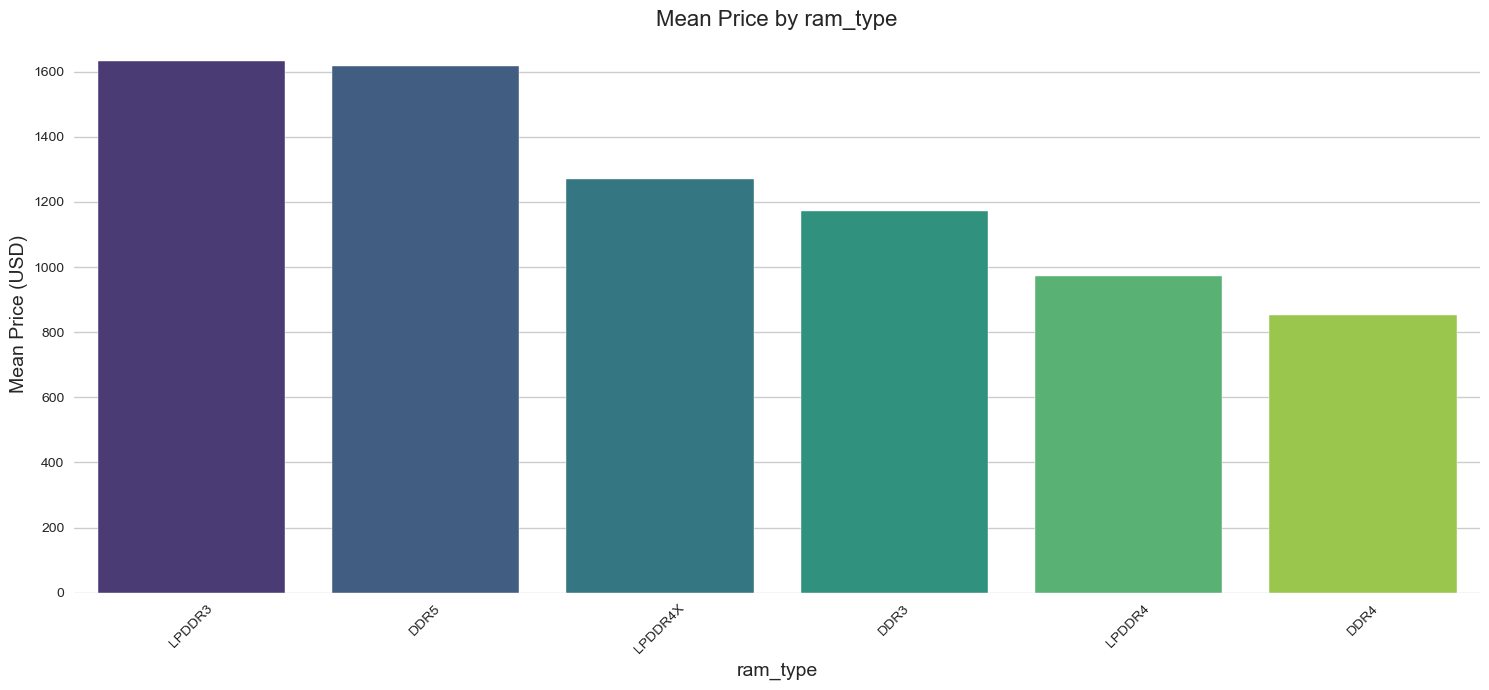

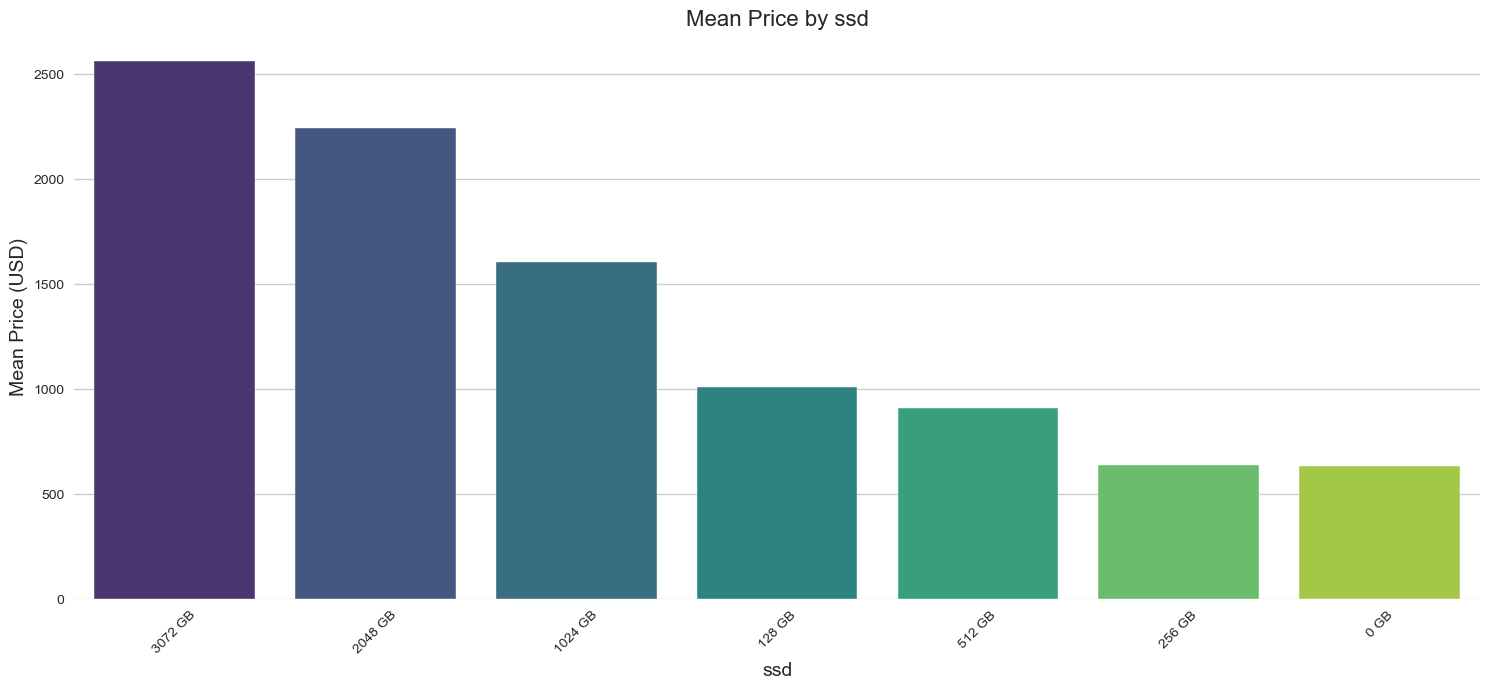

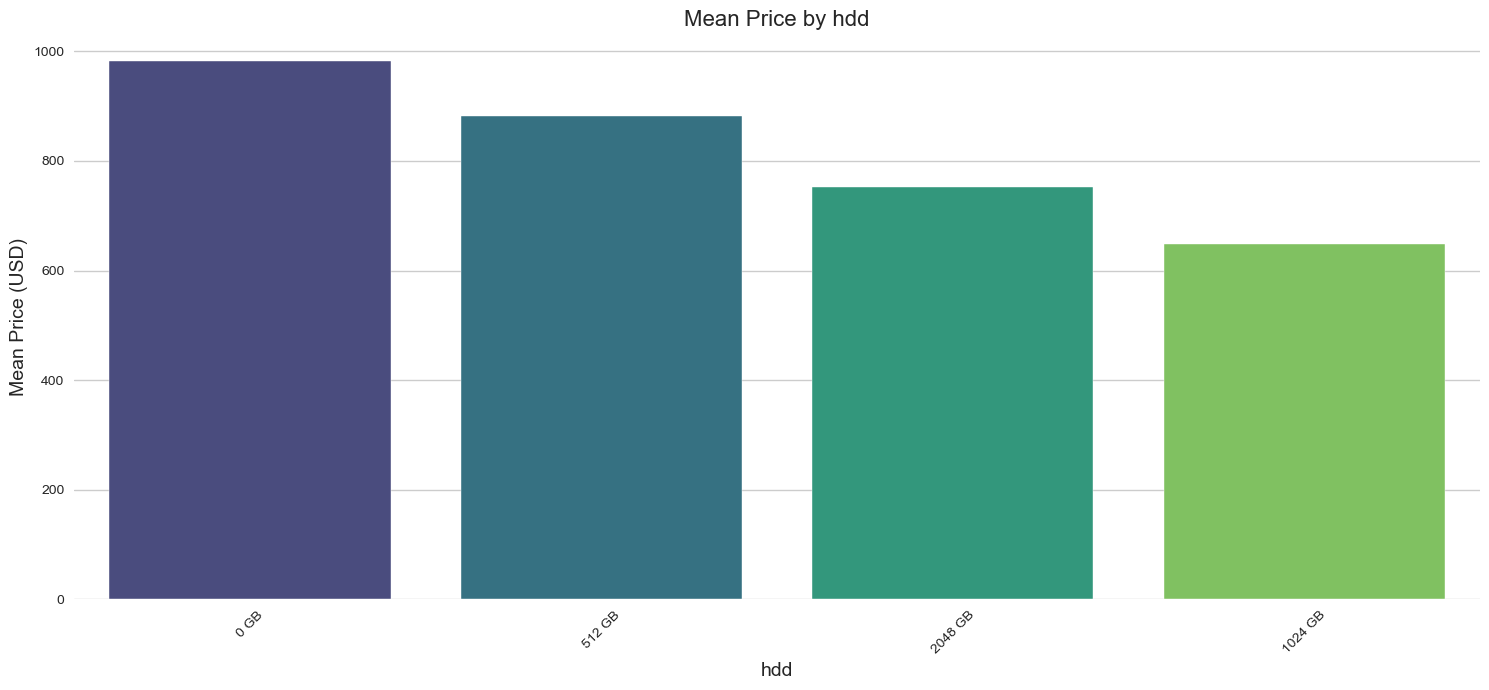

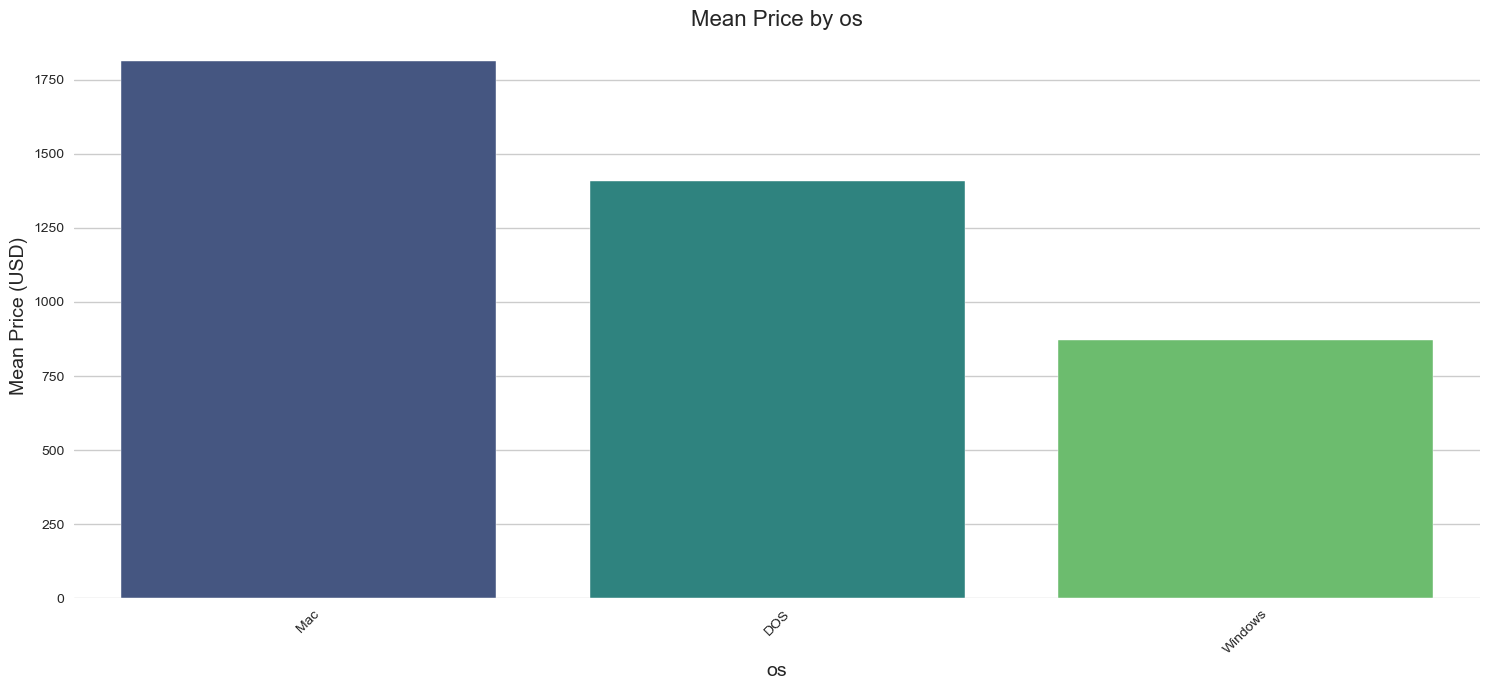

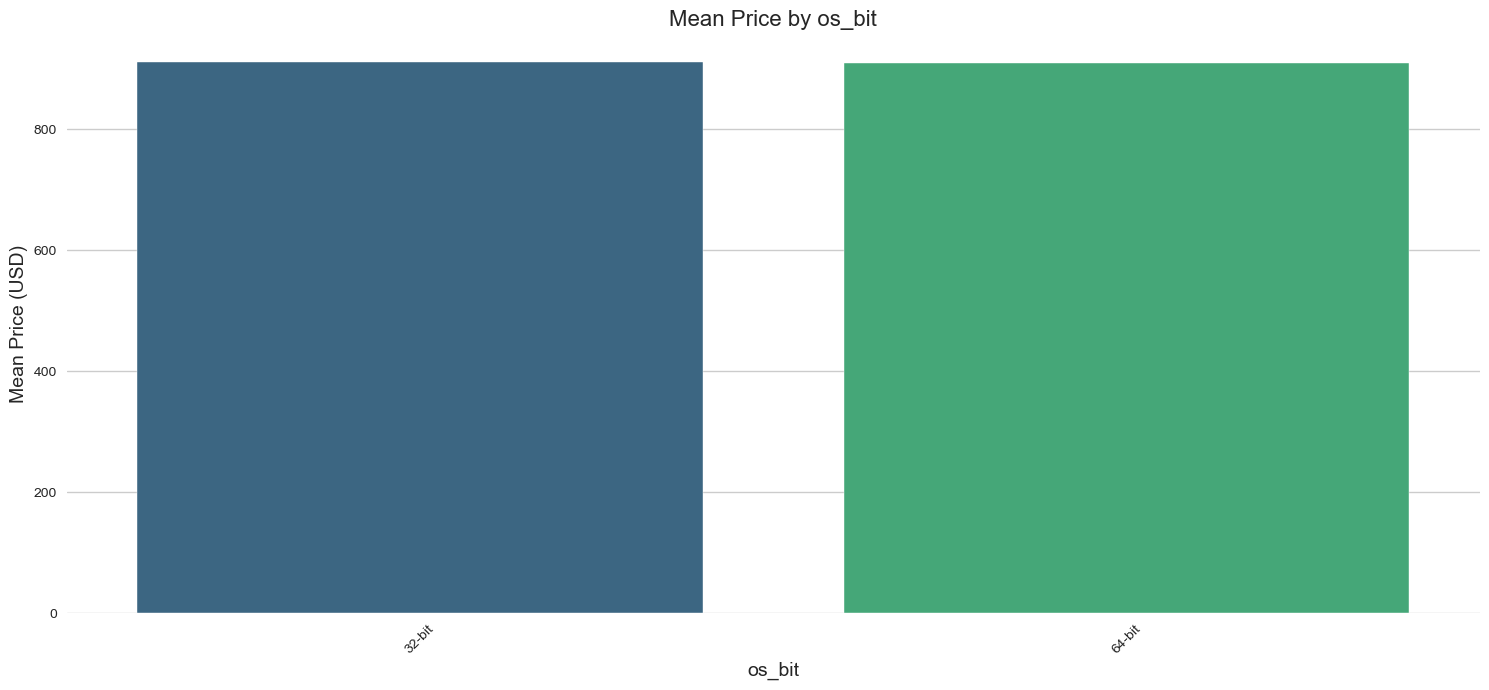

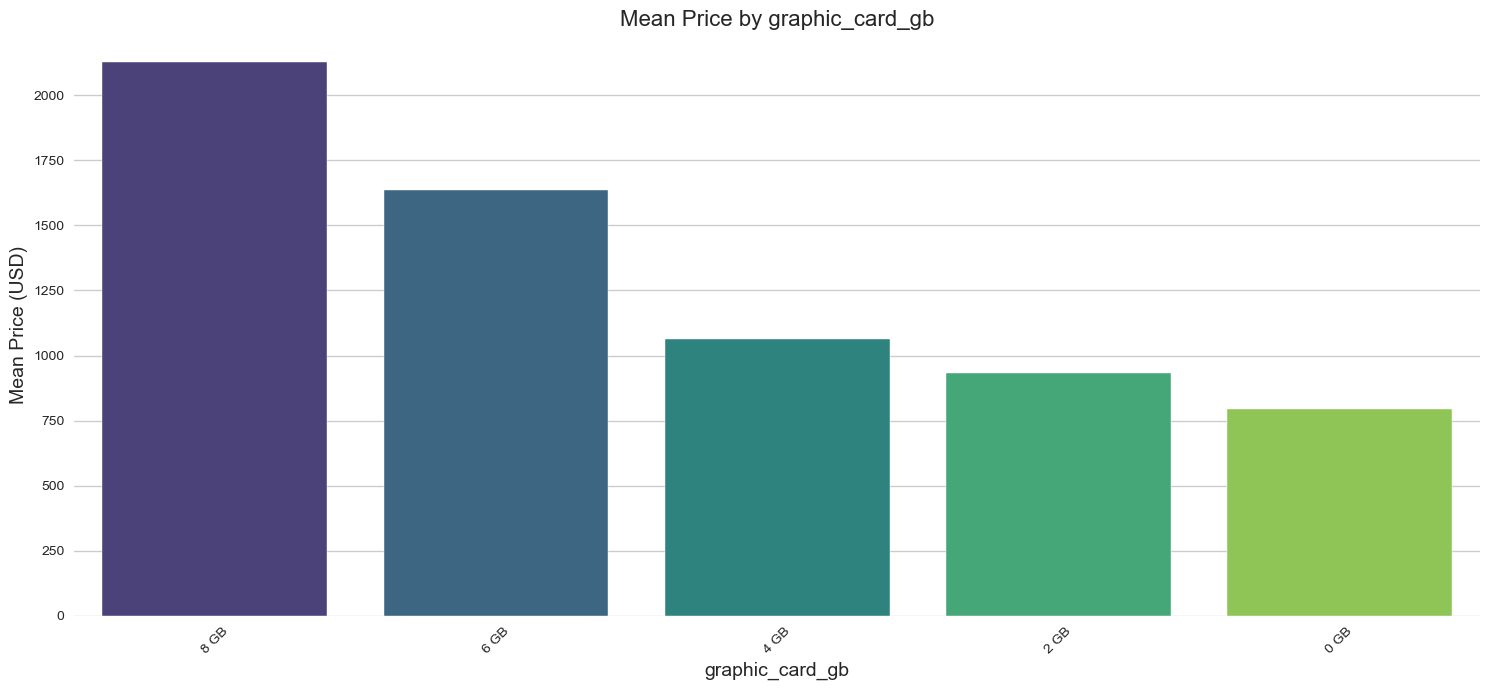

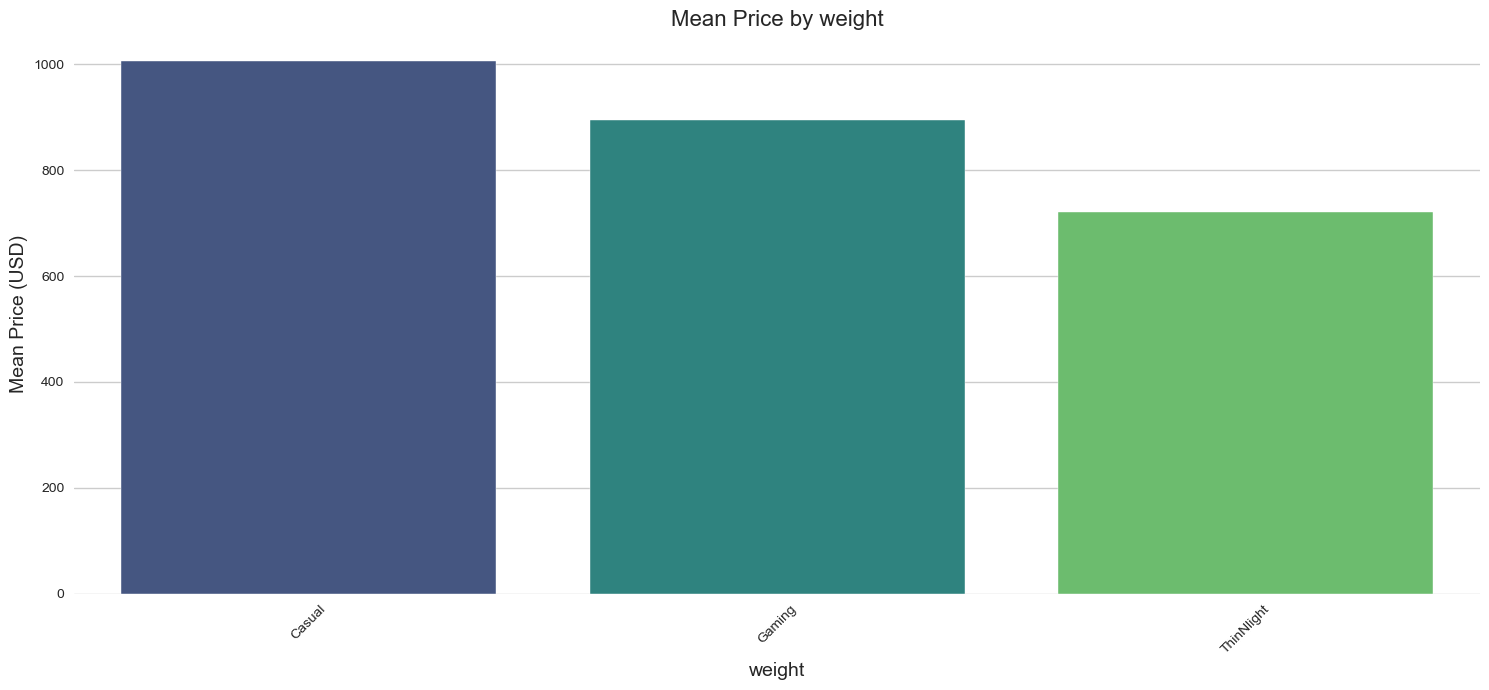

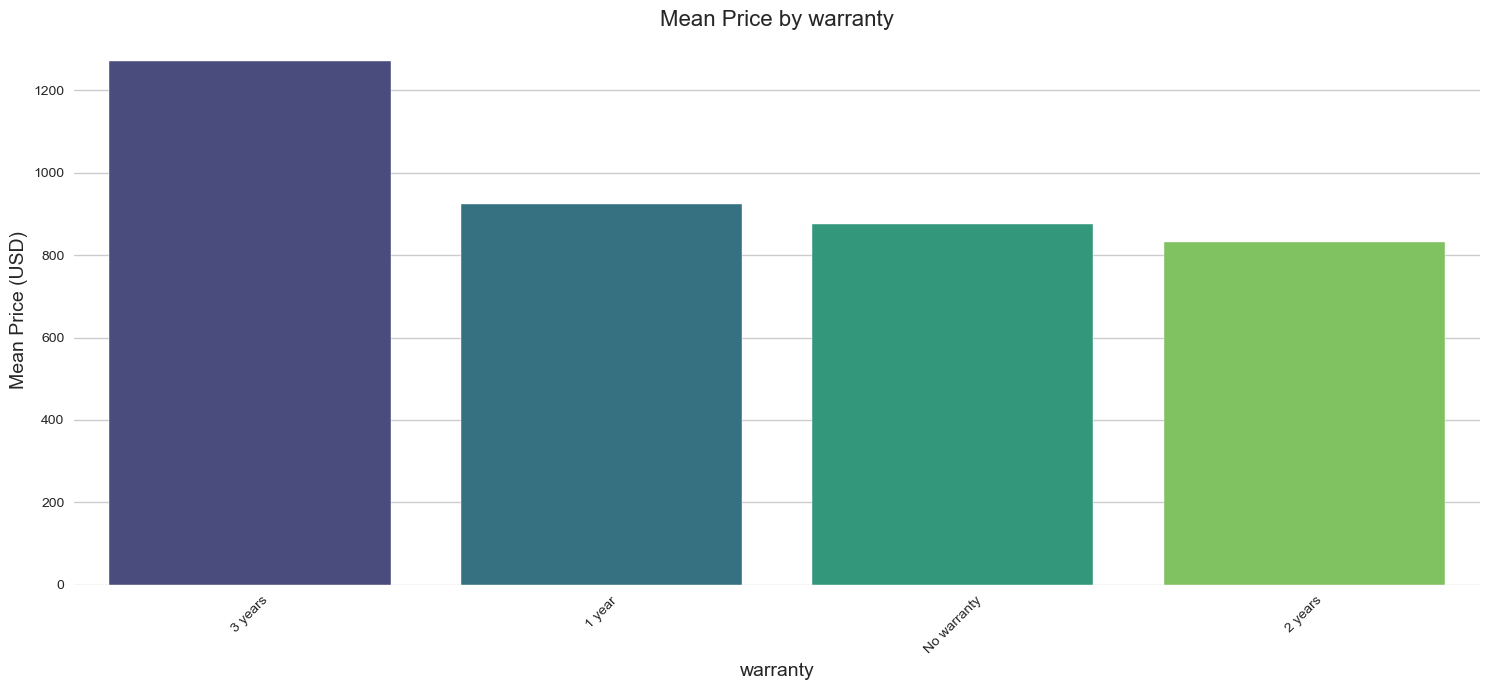

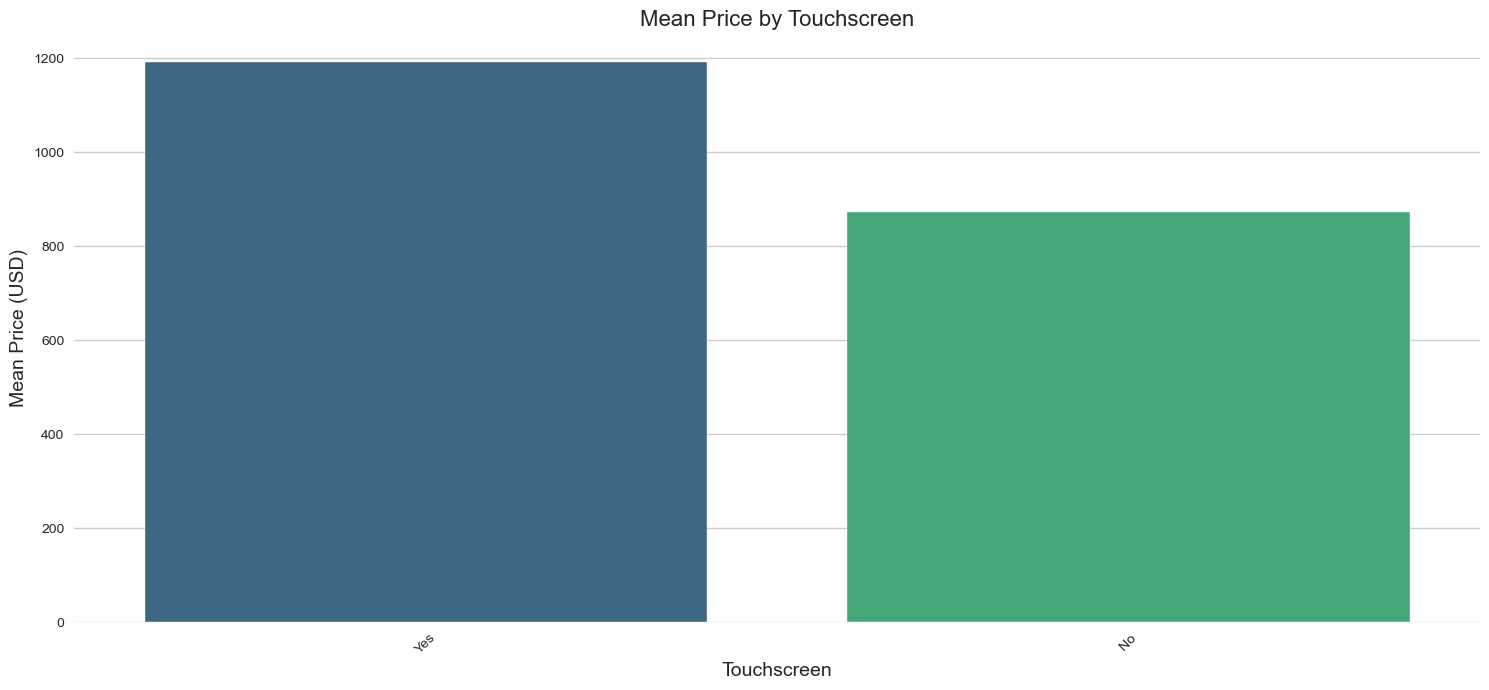

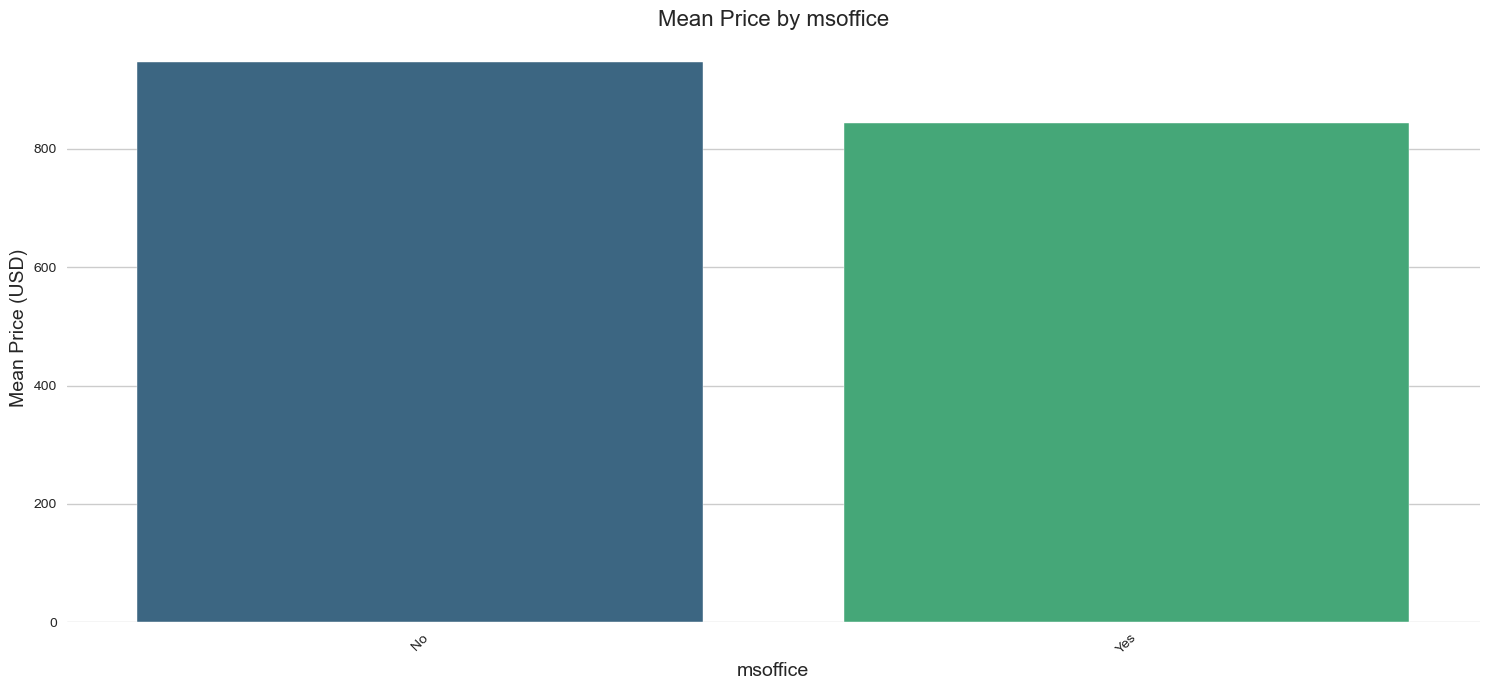

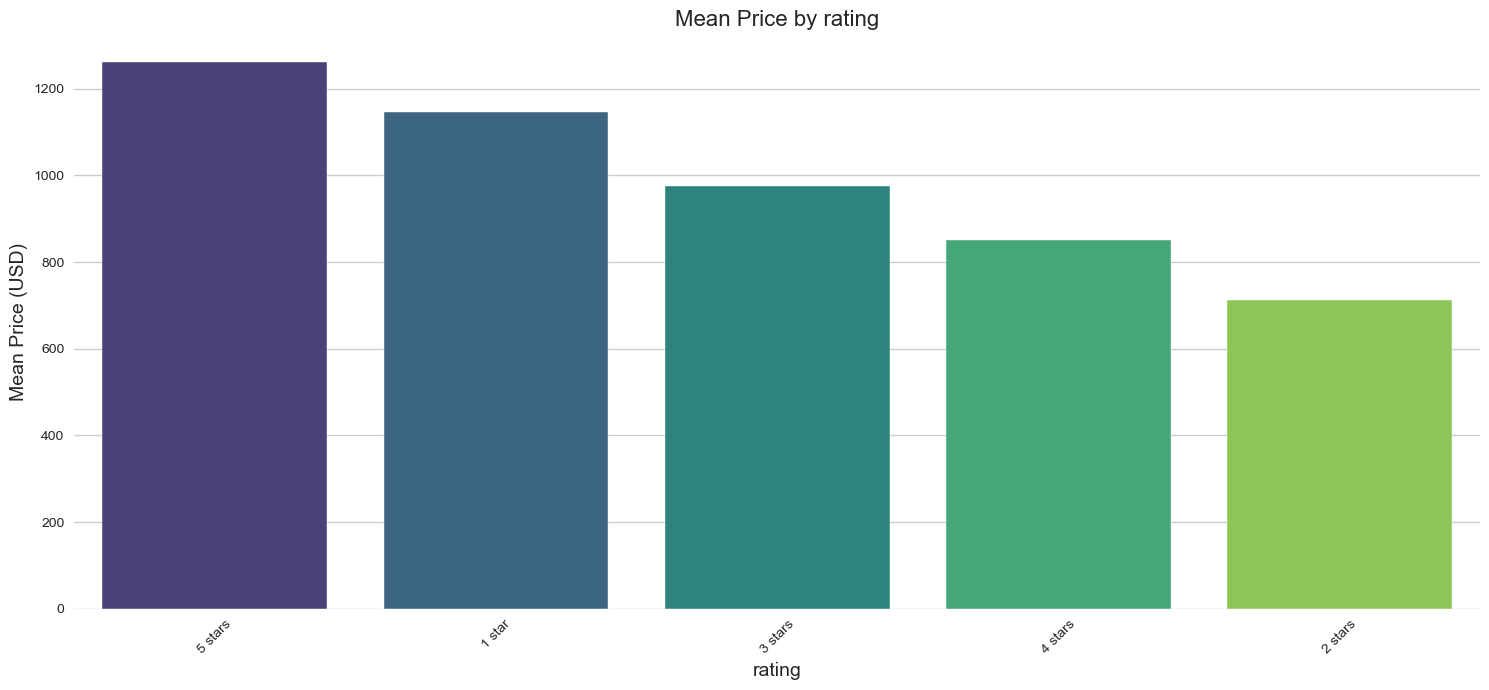

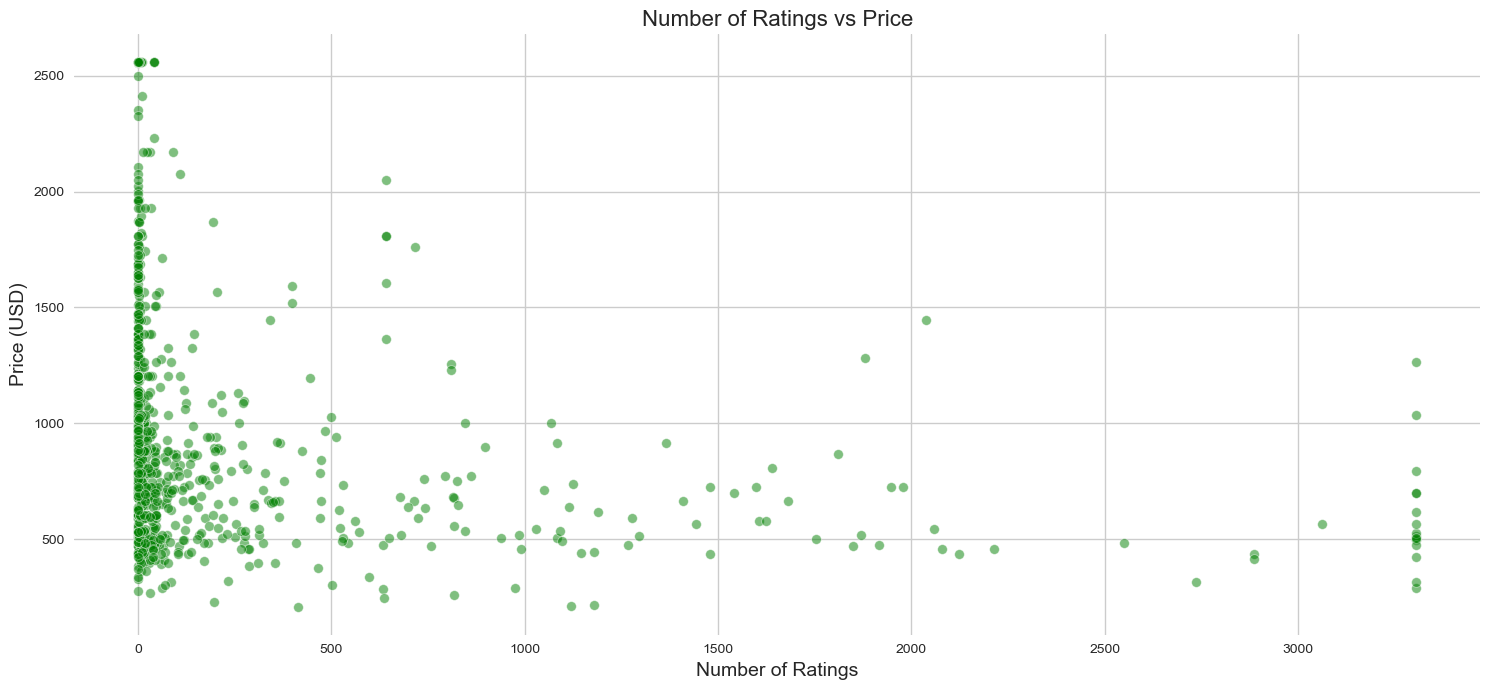

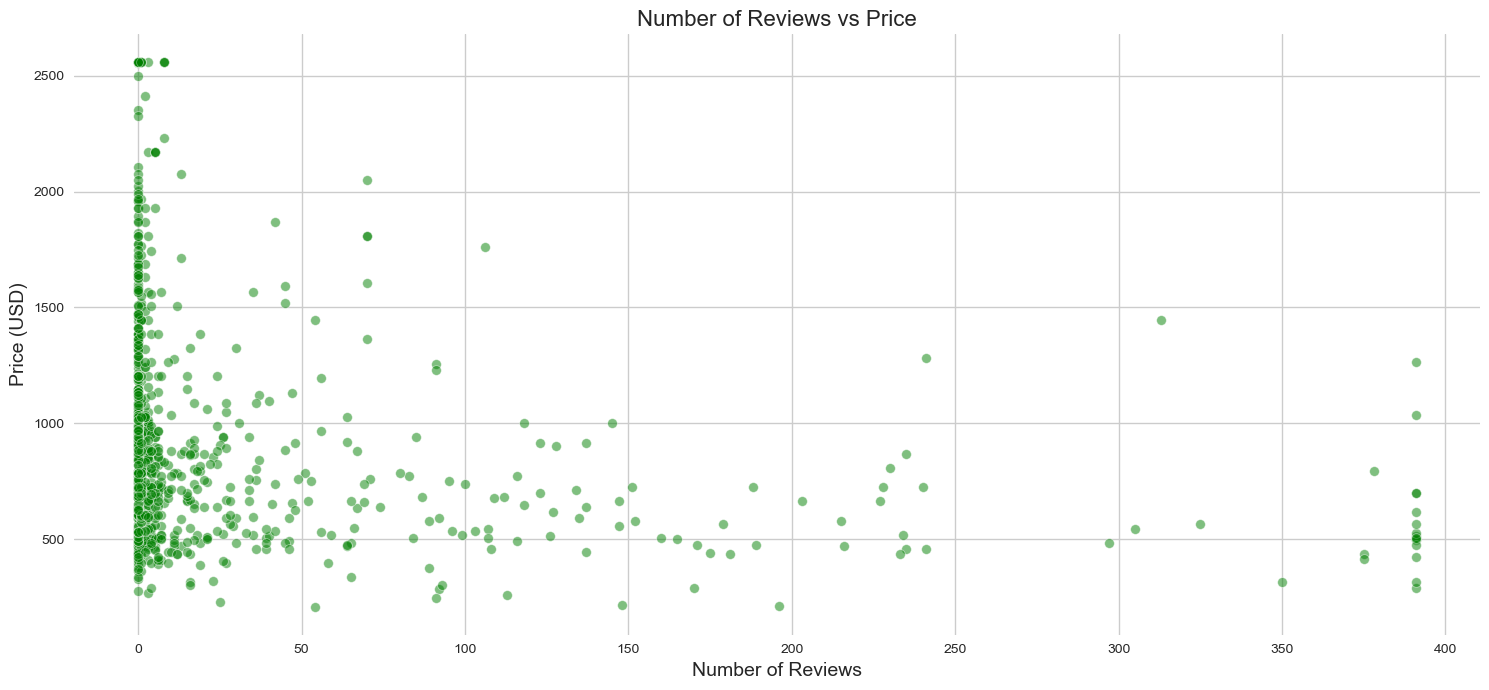

In [25]:
for column in df2.columns:
    # Skip the 'Price_USD' column
    if column == 'Price_USD':
        continue
    
    # Get the data type of the column
    data_type = df2[column].dtype
    
    # Create subplots
    fig, ax = plt.subplots(figsize=(15, 7))
    
    # Determine the appropriate graph type based on data type
    if data_type == 'object':
        # Categorical variable, use a bar plot
        group_data = df2.groupby(column)['Price_USD'].mean()
        group_data_sorted = group_data.sort_values(ascending=False)  # Sort the group_data by ascending price
        sns.barplot(x=group_data_sorted.index, y=group_data_sorted.values, ax=ax, palette='viridis')
        ax.set_xlabel(column, fontsize=14)
        ax.set_ylabel('Mean Price (USD)', fontsize=14)
        ax.set_title(f'Mean Price by {column}', fontsize=16)
        ax.tick_params(axis='x', rotation=45)
    elif data_type == 'float64':
        # Numerical variable, use a scatter plot
        sns.scatterplot(x=df2[column], y=df2['Price_USD'], ax=ax, color='g', alpha=0.5)
        ax.set_xlabel(column, fontsize=14)
        ax.set_ylabel('Price (USD)', fontsize=14)
        ax.set_title(f'{column} vs Price', fontsize=16)
    
    plt.tight_layout()
    plt.show()

The graph shows the relationship between the brand, price, and processor brand of laptops. Only Apple uses the M1 processor. It is seen that laptops that uses Intel processor are higher priced.

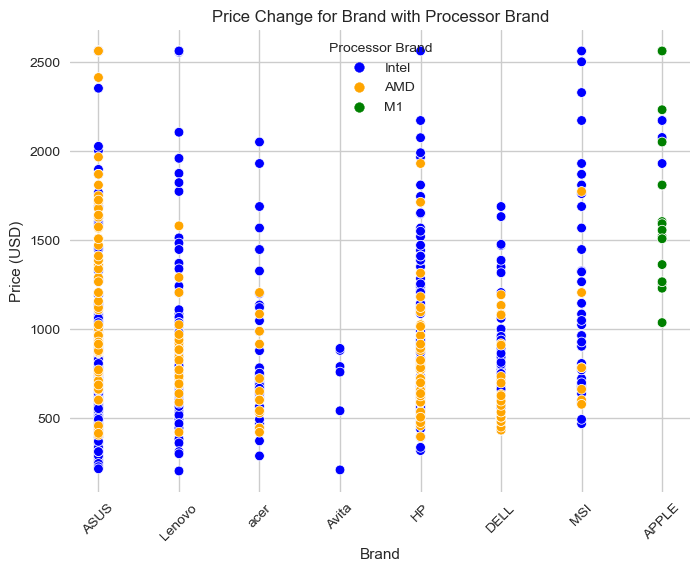

In [26]:
filtered_df = df2[(df2['brand'] != 'Apple') | (df2['processor_brand'] != 'M1')]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='brand', y='Price_USD', hue='processor_brand', palette=['blue', 'orange', 'green'])
plt.xlabel('Brand')
plt.ylabel('Price (USD)')
plt.title('Price Change for Brand with Processor Brand')
plt.legend(title='Processor Brand')
plt.xticks(rotation=45)
plt.show()

Higher price laptops mostly get 3 or 4 stars.

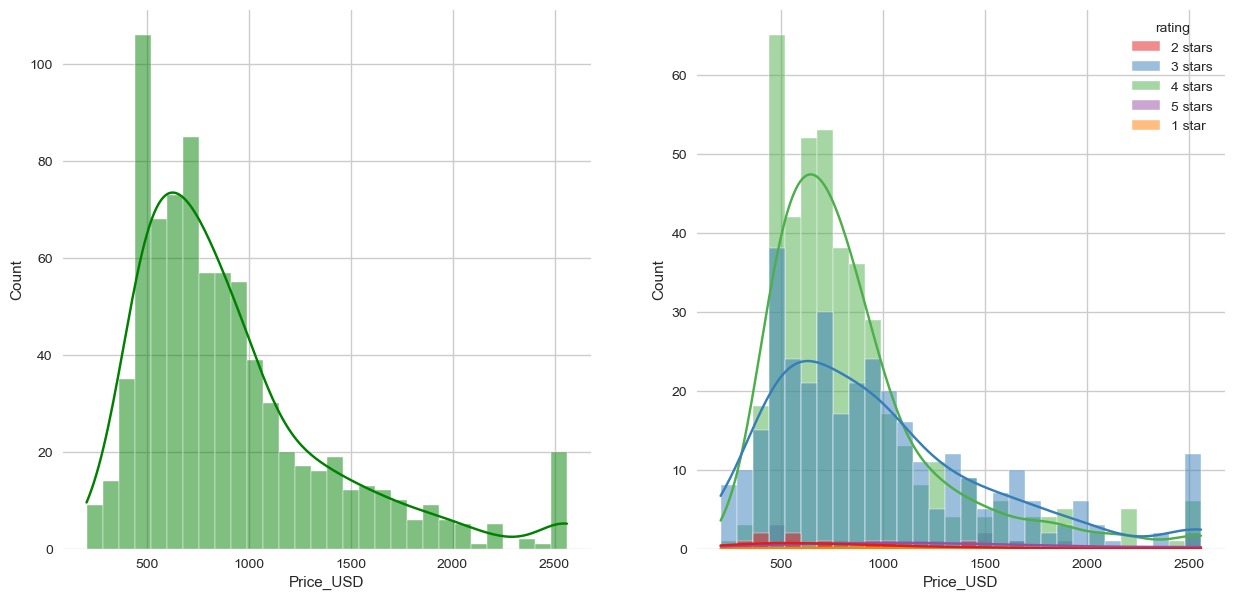

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df2, x='Price_USD', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df2, x='Price_USD', bins=30, kde=True, hue='rating', palette='Set1')

plt.show()

Brands and processor brands sorted by price.

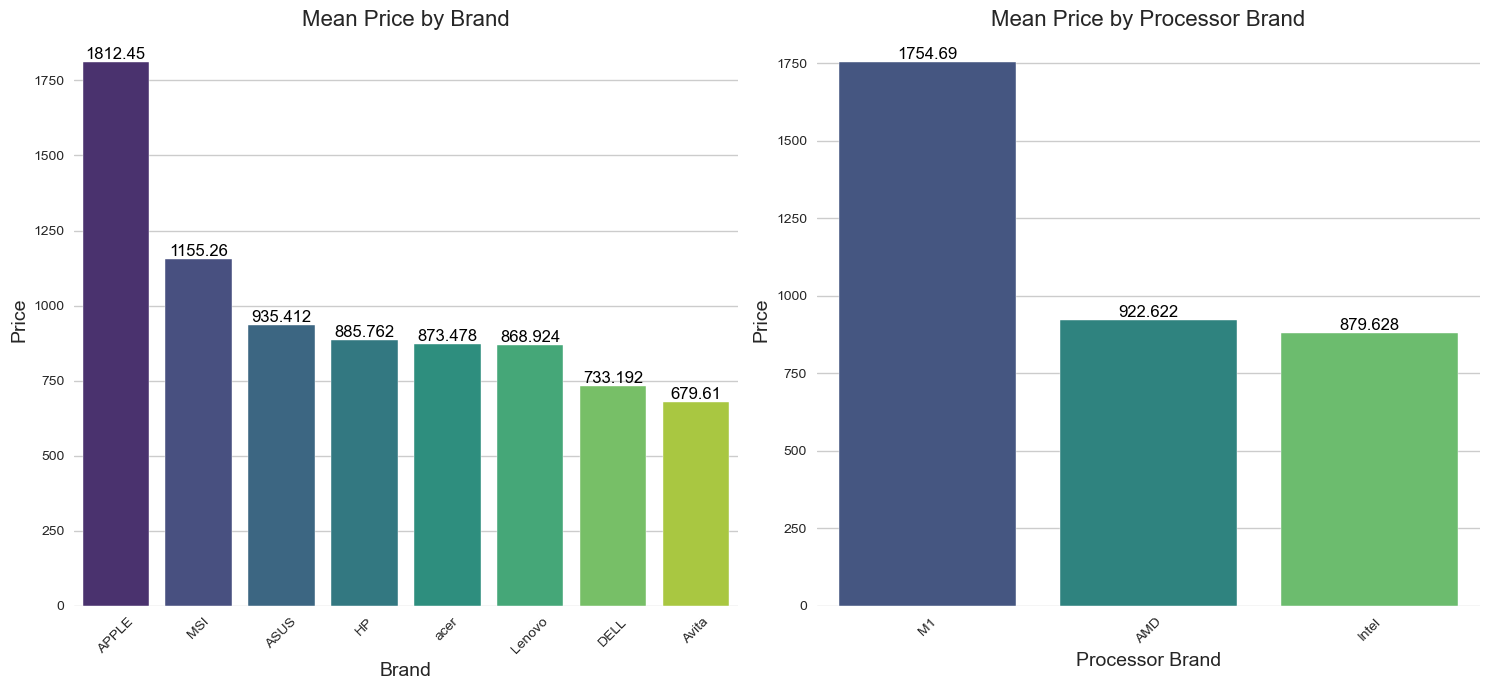

In [28]:
f, ax = plt.subplots(1, 2, figsize=(15, 7))

# Bar plot: Mean Price by Brand
Group_data_b = df2.groupby('brand')['Price_USD'].mean().sort_values(ascending=False)
sns.barplot(x=Group_data_b.index, y=Group_data_b.values, ax=ax[0], palette='viridis')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)
ax[0].set_xlabel("Brand", fontsize=14)
ax[0].set_ylabel("Price", fontsize=14)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title("Mean Price by Brand", fontsize=16)

# Bar plot: Mean Price by Processor Brand
Group_data_p = df2.groupby('processor_brand')['Price_USD'].mean().sort_values(ascending=False)
sns.barplot(x=Group_data_p.index, y=Group_data_p.values, ax=ax[1], palette='viridis')
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)
ax[1].set_xlabel("Processor Brand", fontsize=14)
ax[1].set_ylabel("Price", fontsize=14)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title("Mean Price by Processor Brand", fontsize=16)

plt.tight_layout()
plt.show()

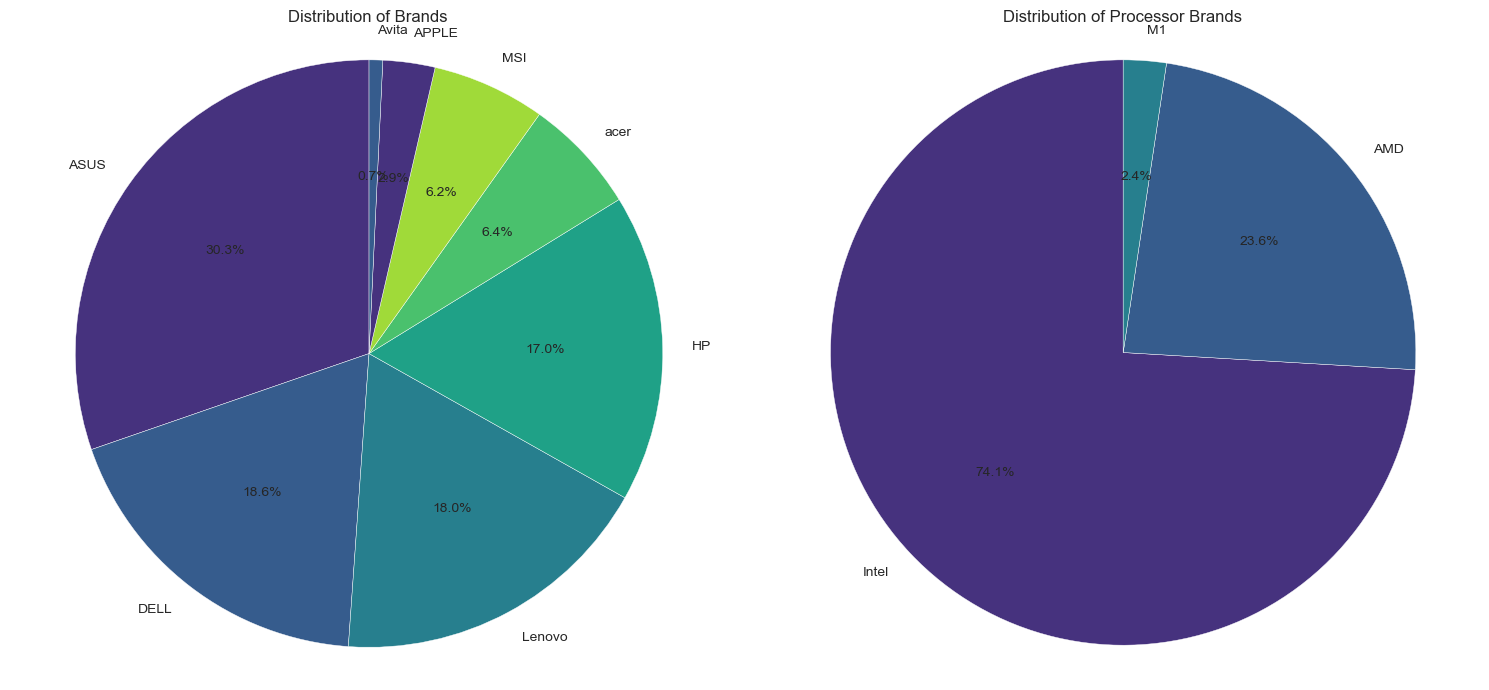

In [29]:
f, ax = plt.subplots(1, 2, figsize=(15, 7))

# Pie chart: Counts of Brands
brand_counts = df2['brand'].value_counts(normalize=True) * 100
ax[0].pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
ax[0].set_title('Distribution of Brands')
ax[0].axis('equal')

# Pie chart: Counts of Processor Brands
processor_brand_counts = df2['processor_brand'].value_counts(normalize=True) * 100
ax[1].pie(processor_brand_counts, labels=processor_brand_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
ax[1].set_title('Distribution of Processor Brands')
ax[1].axis('equal')

plt.tight_layout()
plt.show()

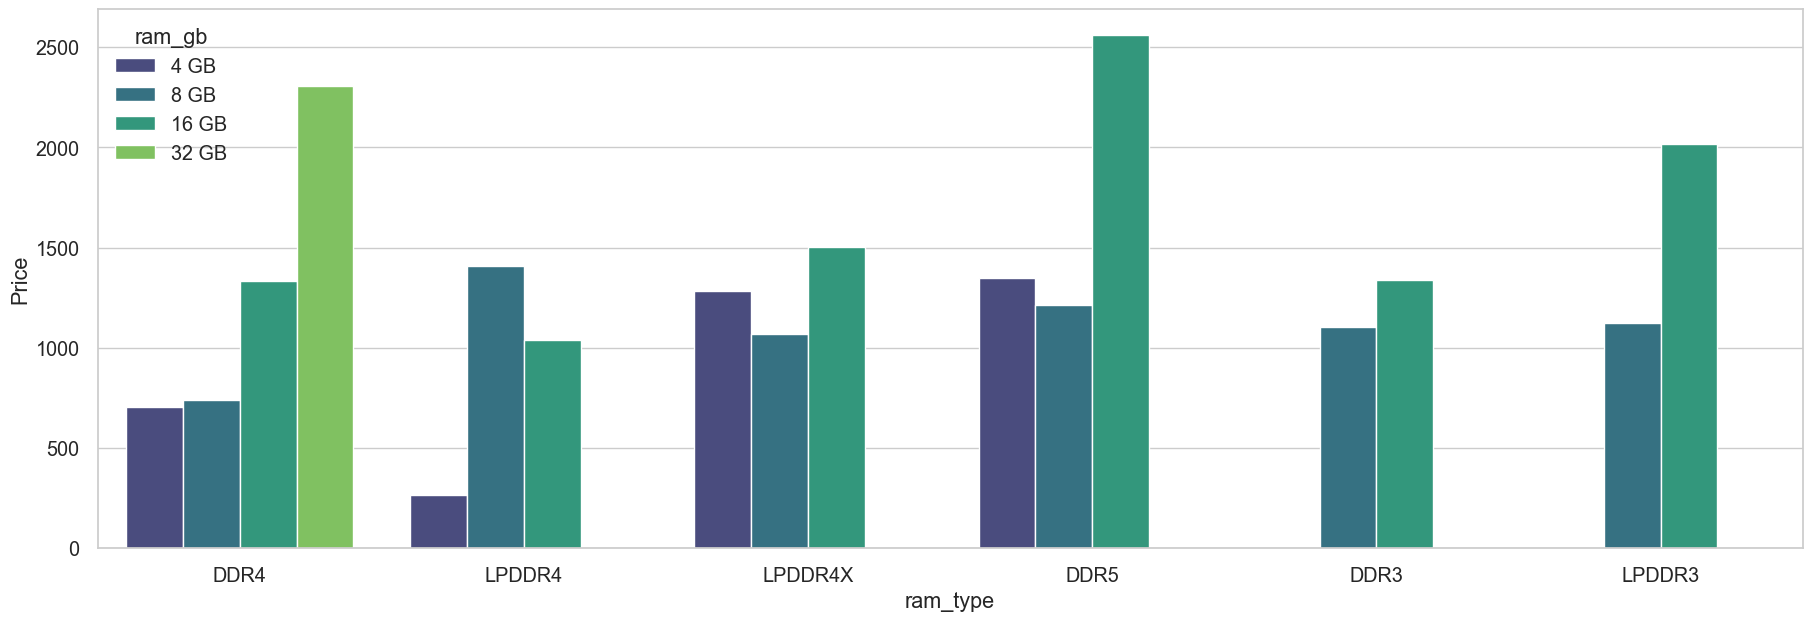

In [30]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=df2['ram_type'], 
                 y=df2['Price_USD'],
                 hue = df2['ram_gb'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Price');

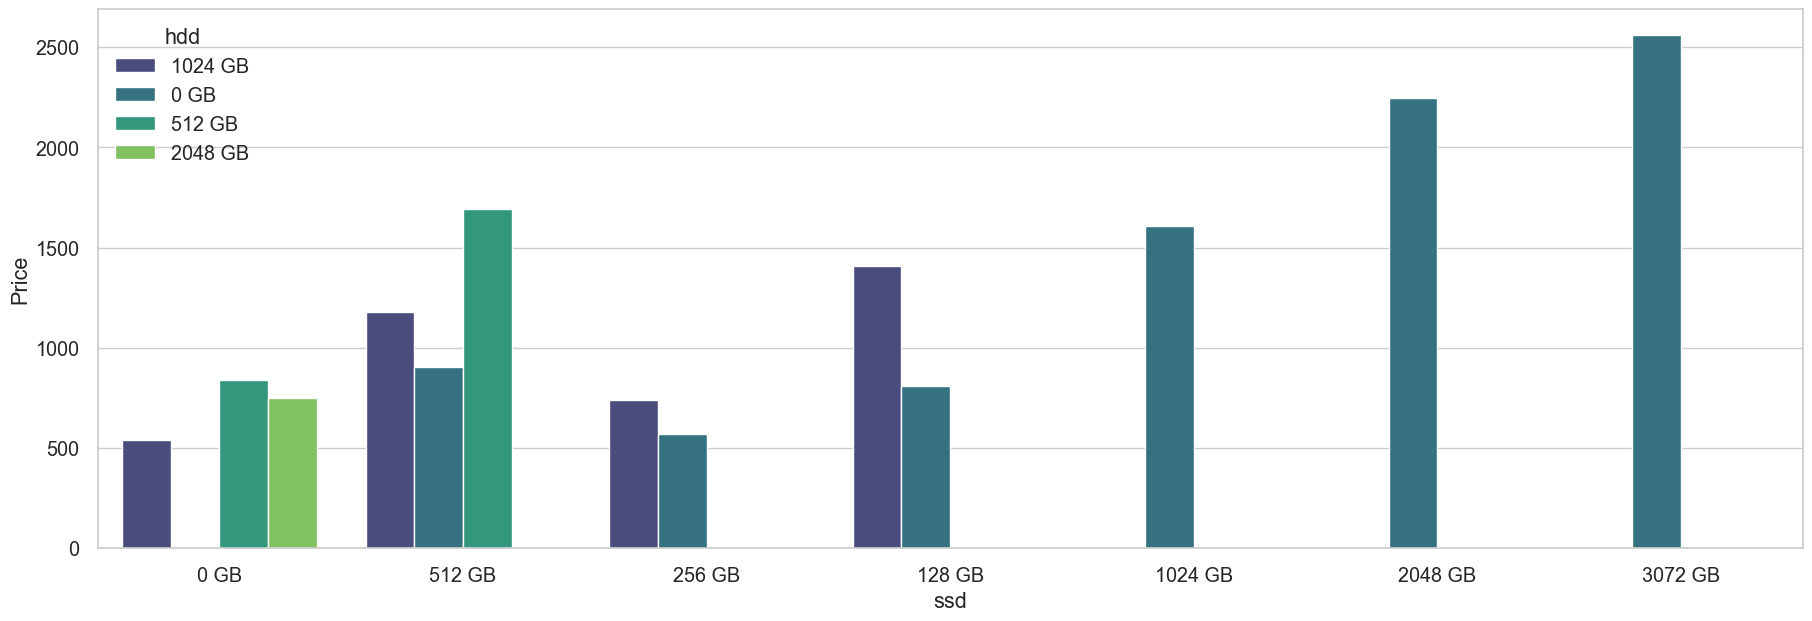

In [31]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=df2['ssd'], 
                 y=df2['Price_USD'],
                 hue = df2['hdd'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Price');

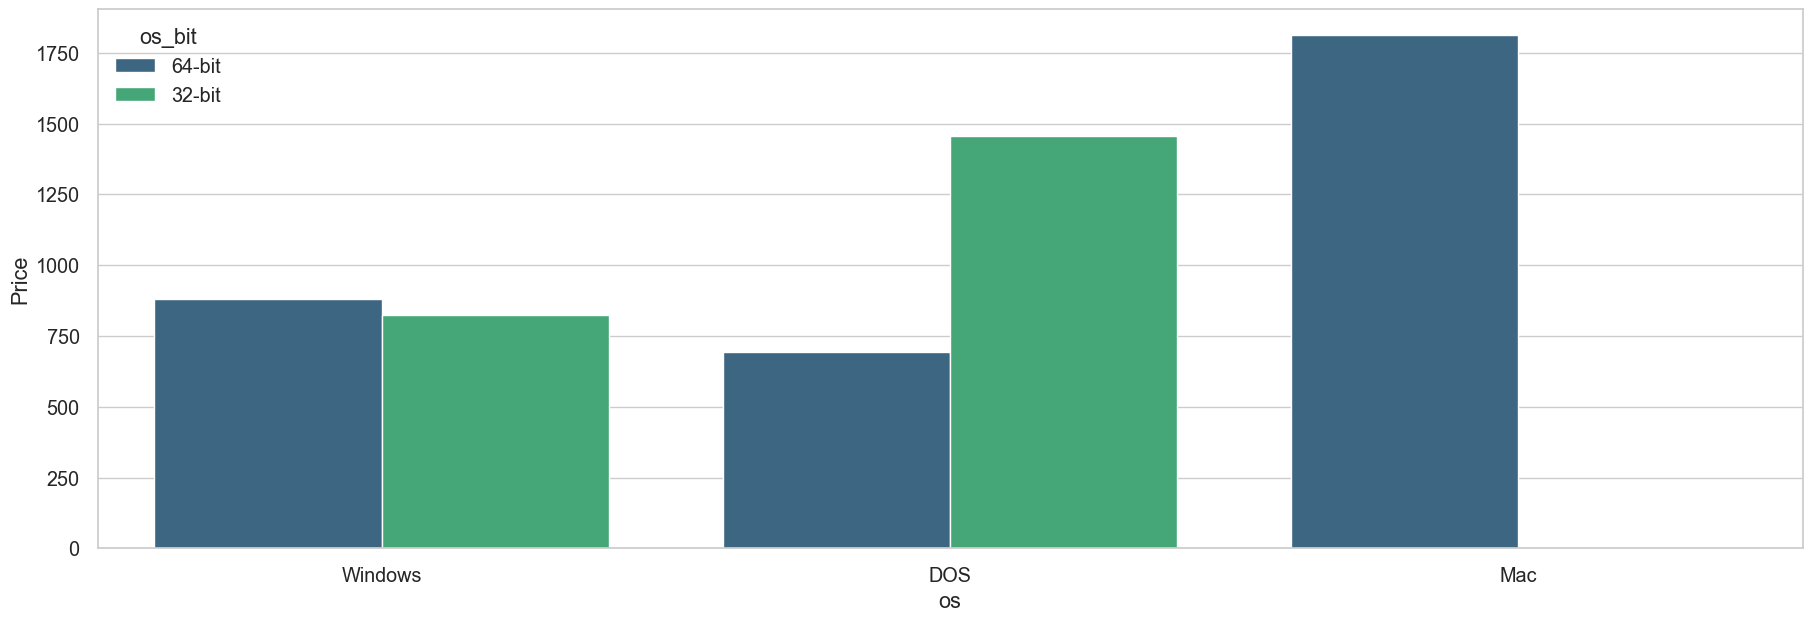

In [32]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=df2['os'], 
                 y=df2['Price_USD'],
                 hue = df2['os_bit'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Price');

In [33]:
df2.to_csv("cleaned_data_laptop.csv")

In [39]:
pivot_table = pd.pivot_table(df3, values='Price_USD', index=['brand', 'processor_brand'], aggfunc='mean')
sorted_pivot_table = pivot_table.sort_values('Price_USD', ascending=False)

print(sorted_pivot_table)

                          Price_USD
brand  processor_brand             
APPLE  Intel            2086.780000
       M1               1754.691277
MSI    Intel            1194.679468
ASUS   AMD              1182.422175
HP     Intel             923.412647
acer   Intel             919.287500
MSI    AMD               913.090000
Lenovo AMD               879.321154
       Intel             866.633680
ASUS   Intel             843.306223
HP     AMD               807.039091
acer   AMD               763.534000
DELL   Intel             755.310339
Avita  Intel             679.610000
DELL   AMD               648.999677
